In [1]:
pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def product_state(probabilities):
    """
    probabilities: list of 1D arrays [pA, pB, pC, ...]
    returns: tensor psi[i,j,k,...]
    """
    psi = probabilities[0]
    for p in probabilities[1:]:
        psi = np.tensordot(psi, p, axes=0)
    return np.sqrt(psi)


In [4]:
pA = np.array([0.5, 0.5])
pB = np.array([0.5, 0.5])
pC = np.array([0.5, 0.5])

psi = product_state([pA, pB, pC])


In [5]:
def apply_phases(psi, phase_tensor):
    return psi * np.exp(1j * phase_tensor)


In [6]:
phase_tensor = 2 * np.pi * np.random.rand(*psi.shape)
psi = apply_phases(psi, phase_tensor)


In [7]:
def density_matrix(psi):
    psi_flat = psi.flatten()
    rho = np.outer(psi_flat, psi_flat.conj())
    dims = psi.shape
    return rho.reshape(dims + dims)


In [8]:
def partial_trace(rho, keep, dims):
    """
    rho: density matrix in tensor form with shape dims + dims
    keep: list of subsystem indices to keep
    dims: list of subsystem dimensions
    """
    n = len(dims)
    keep = sorted(keep)
    trace_out = [i for i in range(n) if i not in keep]

    reshaped = rho

    # trace out subsystems, starting from the LAST one
    for i in reversed(trace_out):
        reshaped = np.trace(
            reshaped,
            axis1=i,
            axis2=i + reshaped.ndim // 2
        )

    kept_dims = [dims[i] for i in keep]
    dim_keep = int(np.prod(kept_dims))

    return reshaped.reshape(dim_keep, dim_keep)


In [9]:
dims = [2, 2, 2]   # A, B, C

rho = density_matrix(psi)

rho_A = partial_trace(rho, keep=[0], dims=dims)     # A
rho_AB = partial_trace(rho, keep=[0,1], dims=dims)  # AB


In [10]:
def purity(rho):
    return np.real(np.trace(rho @ rho))


In [11]:
configs = {
    "A|BC": [0],
    "B|AC": [1],
    "C|AB": [2],
    "A|B|C (local A)": [0]
}

results = {}

for name, keep in configs.items():
    rho_red = partial_trace(rho, keep, dims)
    results[name] = purity(rho_red)


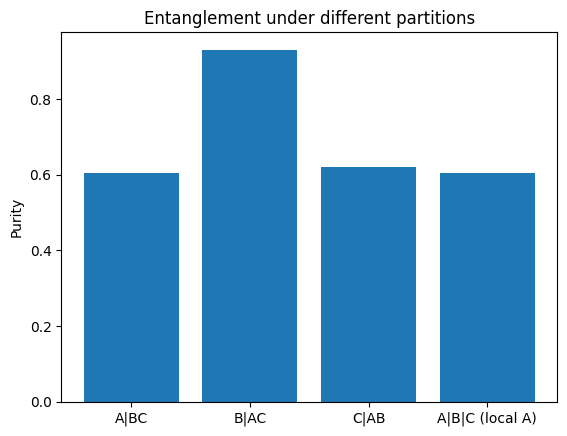

In [12]:
plt.bar(results.keys(), results.values())
plt.ylabel("Purity")
plt.title("Entanglement under different partitions")
plt.show()



🔹 Multipartite Entanglement Simulator 🔹


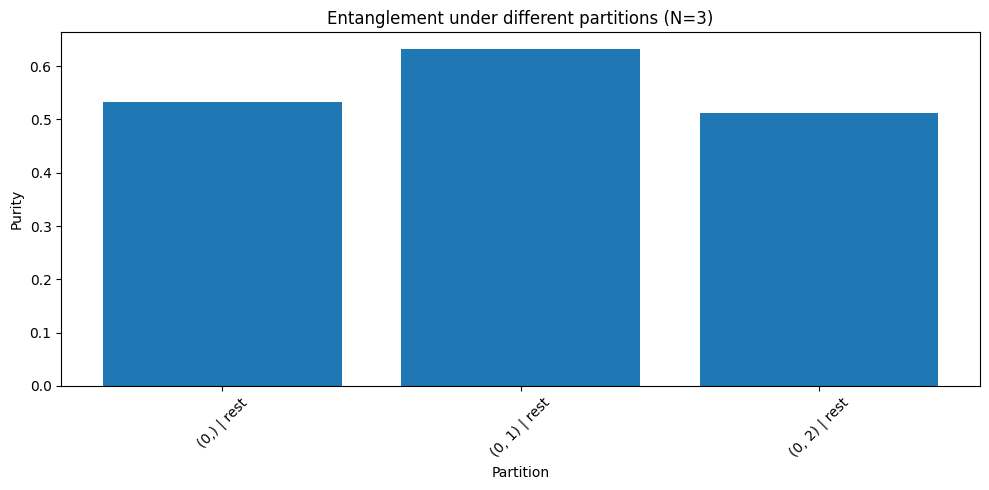

In [13]:
import numpy as np
import itertools
import matplotlib.pyplot as plt



def product_state(probabilities):
    psi = probabilities[0]
    for p in probabilities[1:]:
        psi = np.tensordot(psi, p, axes=0)
    return np.sqrt(psi)

def apply_phases(psi, phase_tensor):
    return psi * np.exp(1j * phase_tensor)

def density_matrix(psi):
    psi_flat = psi.flatten()
    rho = np.outer(psi_flat, psi_flat.conj())
    dims = psi.shape
    return rho.reshape(dims + dims)

def partial_trace(rho, keep, dims):
    n = len(dims)
    trace_out = [i for i in range(n) if i not in keep]
    reshaped = rho

    for i in reversed(trace_out):
        reshaped = np.trace(
            reshaped,
            axis1=i,
            axis2=i + reshaped.ndim // 2
        )

    kept_dims = [dims[i] for i in keep]
    d = int(np.prod(kept_dims))
    return reshaped.reshape(d, d)

def purity(rho):
    return np.real(np.trace(rho @ rho))



def all_bipartitions(n):
    parts = []
    indices = list(range(n))
    for r in range(1, n):
        for subset in itertools.combinations(indices, r):
            complement = tuple(i for i in indices if i not in subset)
            if subset < complement:   # avoid duplicates
                parts.append((subset, complement))
    return parts



def run_simulation():
    print("\n🔹 Multipartite Entanglement Simulator 🔹")
    n = int(input("Enter number of subsystems (e.g. 2, 3, 4): "))

    dims = [2] * n  # qubits by default

    # Uniform product probabilities
    probabilities = [np.ones(d) / d for d in dims]

    # Build state
    psi = product_state(probabilities)

    # Random global phases
    phase_tensor = 2 * np.pi * np.random.rand(*psi.shape)
    psi = apply_phases(psi, phase_tensor)

    # Density matrix
    rho = density_matrix(psi)

    # Compute purities
    labels = []
    values = []

    for keep, _ in all_bipartitions(n):
        rho_red = partial_trace(rho, list(keep), dims)
        p = purity(rho_red)
        labels.append(f"{keep} | rest")
        values.append(p)



    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.ylabel("Purity")
    plt.xlabel("Partition")
    plt.title(f"Entanglement under different partitions (N={n})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    run_simulation()



 Multipartite Entanglement Simulator



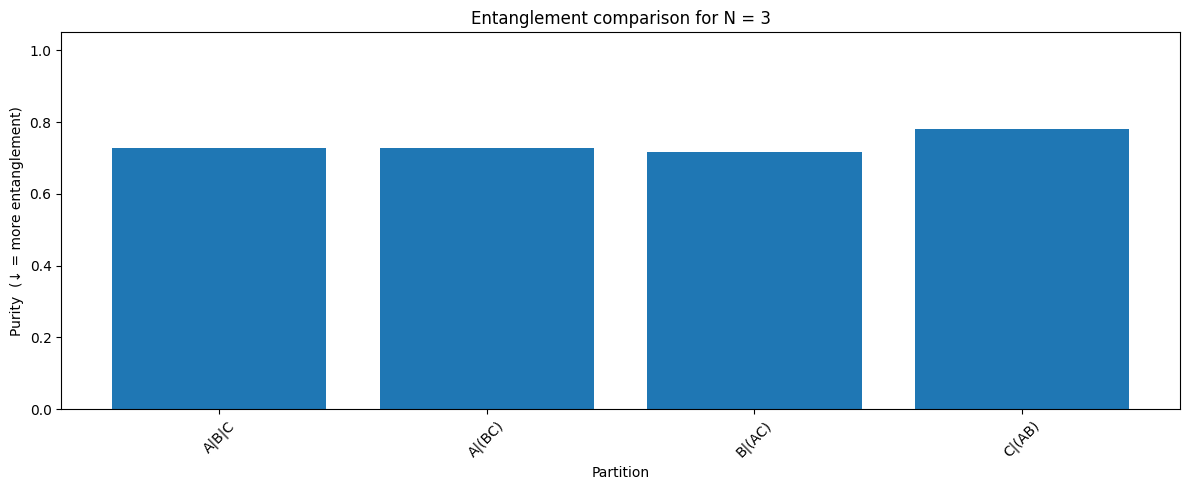

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import string



def product_state(probabilities):
    psi = probabilities[0]
    for p in probabilities[1:]:
        psi = np.tensordot(psi, p, axes=0)
    return np.sqrt(psi)

def apply_phases(psi, phase_tensor):
    return psi * np.exp(1j * phase_tensor)

def density_matrix(psi):
    psi_flat = psi.flatten()
    rho = np.outer(psi_flat, psi_flat.conj())
    return rho.reshape(psi.shape + psi.shape)

def partial_trace(rho, keep, dims):
    n = len(dims)
    trace_out = [i for i in range(n) if i not in keep]
    reshaped = rho

    for i in reversed(trace_out):
        reshaped = np.trace(
            reshaped,
            axis1=i,
            axis2=i + reshaped.ndim // 2
        )

    d = int(np.prod([dims[i] for i in keep]))
    return reshaped.reshape(d, d)

def purity(rho):
    return np.real(np.trace(rho @ rho))



def partitions_human(n):
    labels = list(string.ascii_uppercase[:n])
    dims = [2] * n

    partitions = []

    # Fully local: A|B|C|...
    partitions.append((
        [[i] for i in range(n)],
        "|".join(labels)
    ))

    # Single vs rest: A|(BC...), etc.
    for i in range(n):
        left = [i]
        right = [j for j in range(n) if j != i]
        label = f"{labels[i]}|({''.join(labels[j] for j in right)})"
        partitions.append(([left, right], label))

    # Balanced splits for N >= 4
    if n >= 4:
        seen = set()
        for r in range(2, n//2 + 1):
            for combo in itertools.combinations(range(n), r):
                rest = tuple(i for i in range(n) if i not in combo)
                key = (combo, rest)
                if key in seen or (rest, combo) in seen:
                    continue
                seen.add(key)

                left = list(combo)
                right = list(rest)
                label = f"({''.join(labels[i] for i in left)})|({''.join(labels[i] for i in right)})"
                partitions.append(([left, right], label))

    return partitions



def run():
    print("\n Multipartite Entanglement Simulator\n")
    n = int(input("Enter number of subsystems (2, 3, 4, ...): "))

    dims = [2] * n
    probabilities = [np.ones(2)/2 for _ in range(n)]

    psi = product_state(probabilities)
    phases = 2 * np.pi * np.random.rand(*psi.shape)
    psi = apply_phases(psi, phases)

    rho = density_matrix(psi)

    labels_plot = []
    values_plot = []

    for groups, label in partitions_human(n):
        # For fully local, measure purity of first subsystem only
        if len(groups) == n:
            keep = groups[0]
        else:
            keep = groups[0]

        rho_red = partial_trace(rho, keep, dims)
        p = purity(rho_red)

        labels_plot.append(label)
        values_plot.append(p)



    plt.figure(figsize=(12, 5))
    plt.bar(labels_plot, values_plot)
    plt.ylabel("Purity  (↓ = more entanglement)")
    plt.xlabel("Partition")
    plt.title(f"Entanglement comparison for N = {n}")
    plt.xticks(rotation=45)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    run()



🔥 Multipartite Entanglement 3D Simulator 🔥



C:\Users\ShubhamVY\AppData\Local\Temp\ipykernel_20912\2851588102.py:119: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


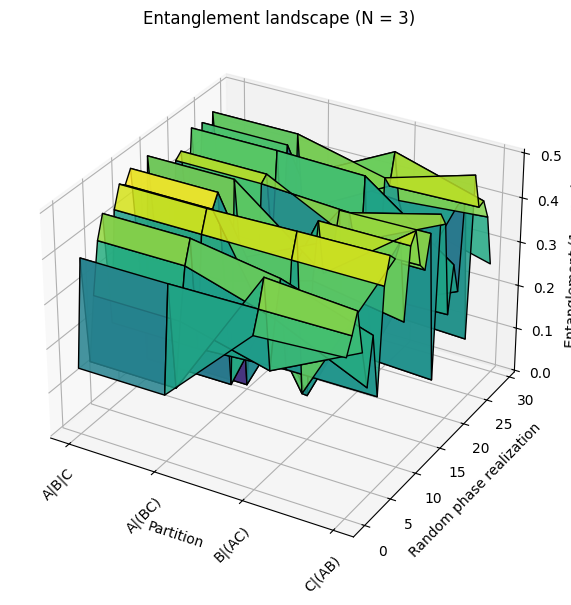

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import string



def product_state(probabilities):
    psi = probabilities[0]
    for p in probabilities[1:]:
        psi = np.tensordot(psi, p, axes=0)
    return np.sqrt(psi)

def apply_phases(psi, phases):
    return psi * np.exp(1j * phases)

def density_matrix(psi):
    psi_flat = psi.flatten()
    rho = np.outer(psi_flat, psi_flat.conj())
    return rho.reshape(psi.shape + psi.shape)

def partial_trace(rho, keep, dims):
    n = len(dims)
    trace_out = [i for i in range(n) if i not in keep]
    reshaped = rho

    for i in reversed(trace_out):
        reshaped = np.trace(
            reshaped,
            axis1=i,
            axis2=i + reshaped.ndim // 2
        )

    d = int(np.prod([dims[i] for i in keep]))
    return reshaped.reshape(d, d)

def purity(rho):
    return np.real(np.trace(rho @ rho))



def human_partitions(n):
    labels = list(string.ascii_uppercase[:n])
    partitions = []

    # Fully local A|B|C|...
    partitions.append(([0], "|".join(labels)))

    # Single vs rest: A|(BC...), etc.
    for i in range(n):
        left = [i]
        right = [j for j in range(n) if j != i]
        label = f"{labels[i]}|({''.join(labels[j] for j in right)})"
        partitions.append((left, label))

    # Balanced splits for n >= 4
    if n >= 4:
        seen = set()
        for r in range(2, n // 2 + 1):
            for combo in itertools.combinations(range(n), r):
                rest = tuple(i for i in range(n) if i not in combo)
                key = (combo, rest)
                if key in seen or (rest, combo) in seen:
                    continue
                seen.add(key)
                label = f"({''.join(labels[i] for i in combo)})|({''.join(labels[i] for i in rest)})"
                partitions.append((list(combo), label))

    return partitions



def run_simulation():
    print("\n🔥 Multipartite Entanglement 3D Simulator 🔥\n")
    n = int(input("Enter number of subsystems (2, 3, 4, ...): "))

    dims = [2] * n
    probabilities = [np.ones(2) / 2 for _ in range(n)]

    partitions = human_partitions(n)
    num_parts = len(partitions)
    samples = 30   # number of random phase realizations

    Z = np.zeros((samples, num_parts))

    for s in range(samples):
        psi = product_state(probabilities)
        phases = 2 * np.pi * np.random.rand(*psi.shape)
        psi = apply_phases(psi, phases)
        rho = density_matrix(psi)

        for p_idx, (keep, label) in enumerate(partitions):
            rho_red = partial_trace(rho, keep, dims)
            Z[s, p_idx] = 1 - purity(rho_red)   # entanglement measure

    X, Y = np.meshgrid(range(num_parts), range(samples))



    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        X, Y, Z,
        cmap='viridis',
        edgecolor='k',
        alpha=0.85
    )

    ax.set_xlabel("Partition")
    ax.set_ylabel("Random phase realization")
    ax.set_zlabel("Entanglement (1 − purity)")
    ax.set_title(f"Entanglement landscape (N = {n})")

    ax.set_xticks(range(num_parts))
    ax.set_xticklabels([label for _, label in partitions], rotation=45)

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    run_simulation()
